In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
data = pd.read_csv("D:/Projects/Sales Prediction/advertising.csv")

In [62]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
print("Missing values:",data.isnull().sum())

Missing values: TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [7]:
# Checking for duplicate rows
print("Duplicate Rows:", data.duplicated().sum())

Duplicate Rows: 0


In [8]:
# Summary statistics
print("Summary Statistics:\n", data.describe())

Summary Statistics:
                TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


<b> Outlier Detection </b>

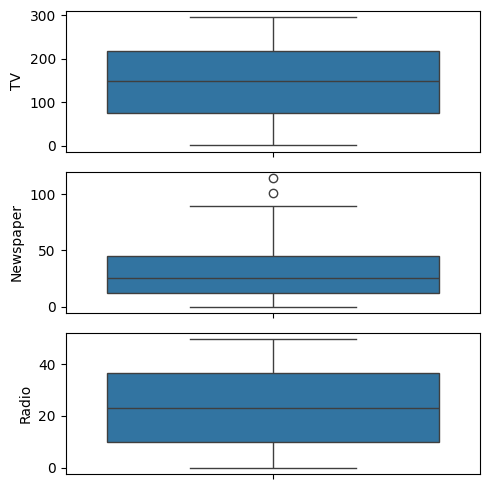

In [17]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['Radio'], ax = axs[2])
plt.tight_layout()

<i>There is no outliers</i>

<b> Coreelation between variables </b>

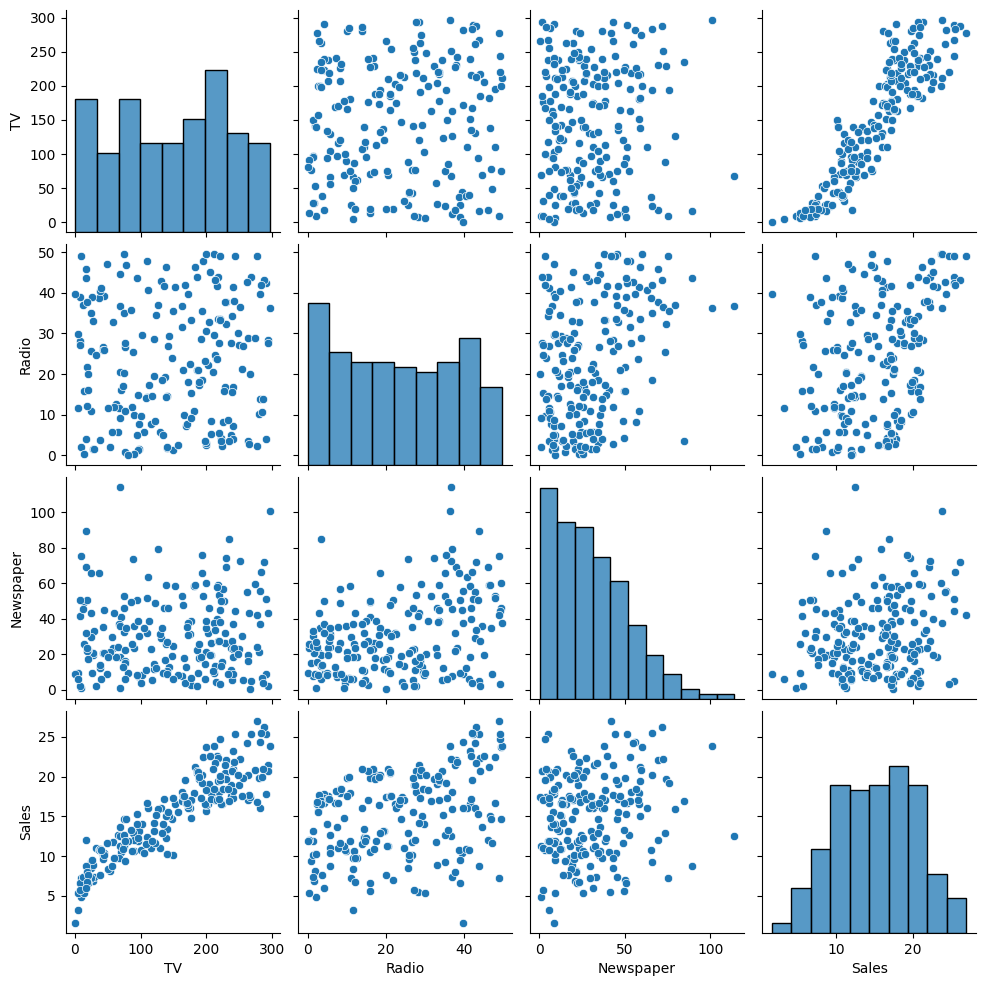

In [9]:
sns.pairplot(data)
plt.show()

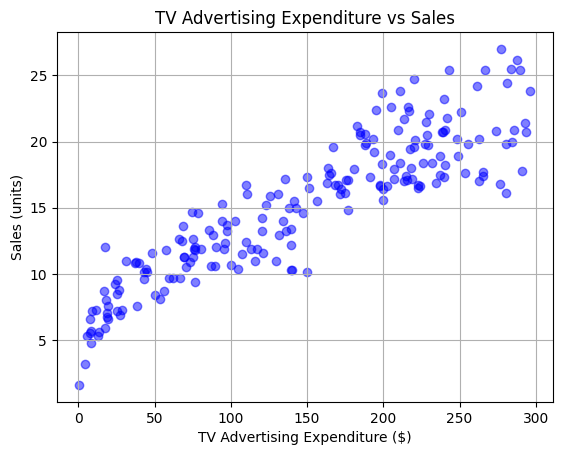

In [96]:
# Plotting TV advertising expenditure vs Sales
plt.scatter(data['TV'], data['Sales'], color='blue', alpha=0.5)
plt.title('TV Advertising Expenditure vs Sales')
plt.xlabel('TV Advertising Expenditure ($)')
plt.ylabel('Sales (units)')
plt.grid(True)
plt.show()

<i> Advertising in TV increases the sales and highly coreelated to each other</i>

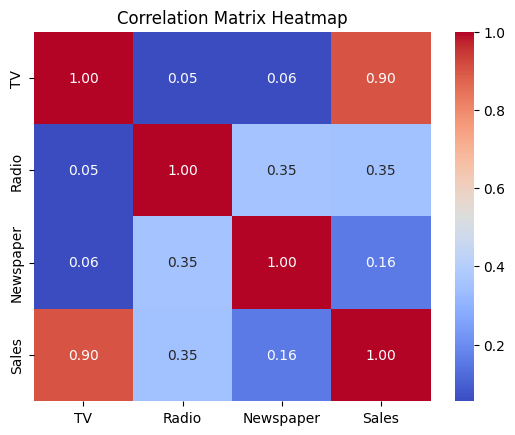

In [10]:
# Correlation matrix heatmap
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

<b> Model Building </b>

In [98]:
# Splitting the data into features and target variable
x = data[['TV']]
y = data['Sales']

In [99]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [100]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [101]:
y_pred = model.predict(X_test)

In [102]:
print(y_pred[0])

16.06747317224979


<b> Evaluating the model </b>

In [103]:
from sklearn.metrics import mean_squared_error

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 6.101072906773963


In [104]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
r_squared

0.802561303423698

<b> Predicting sales</b>

In [109]:
input_data=[283.6] 
input_data_as_numpy_array = np.asarray(input_data)
test_data = input_data_as_numpy_array.reshape(1,-1)

In [110]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names, but LinearRegression was fitted with feature names")

prediction = model.predict(test_data)
print("Sales:",prediction[0])

Sales: 22.742071327204812
